In [297]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import confusion_matrix

In [298]:
data = pd.read_csv('cancer patient data sets.csv')

In [299]:
data.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [300]:
data.shape

(1000, 26)

In [301]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [302]:
data.isnull().sum()

,0
index,0
Patient Id,0
Age,0
Gender,0
Air Pollution,0
Alcohol use,0
Dust Allergy,0
OccuPational Hazards,0
Genetic Risk,0
chronic Lung Disease,0


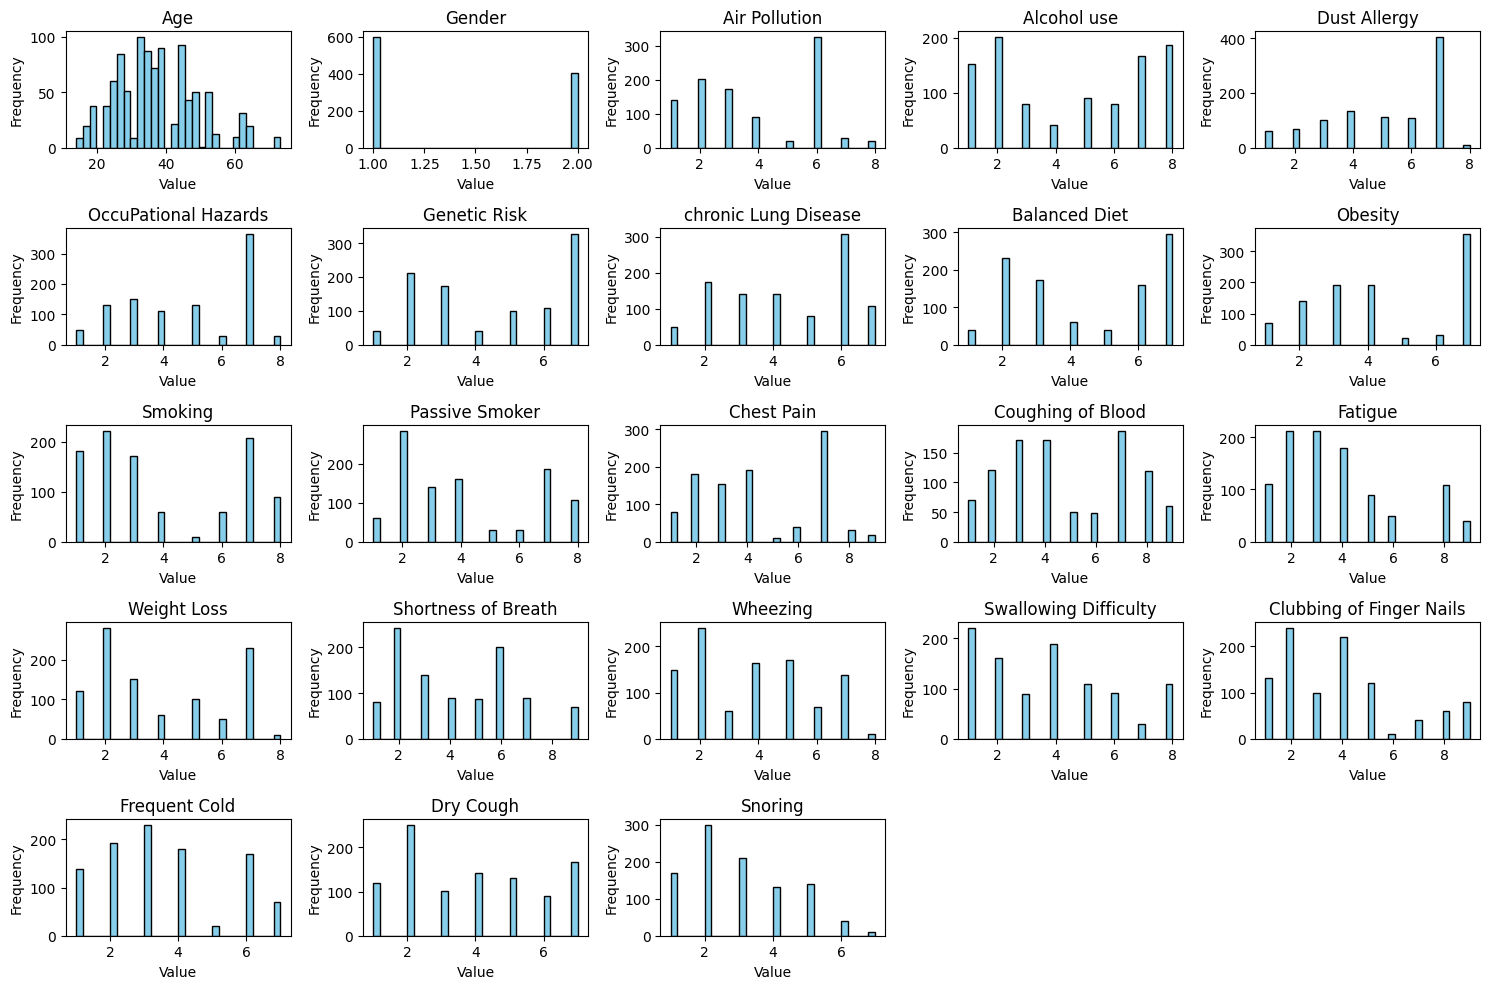

In [303]:
# Plot histograms for each feature
features = data.columns[2:-1]  # Exclude 'index', 'Patient Id', and 'Level'
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(5, 5, i + 1)  # Adjust the number of rows and columns as needed
    plt.hist(data[feature], bins=30, color='skyblue', edgecolor='black')
    plt.title(feature)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

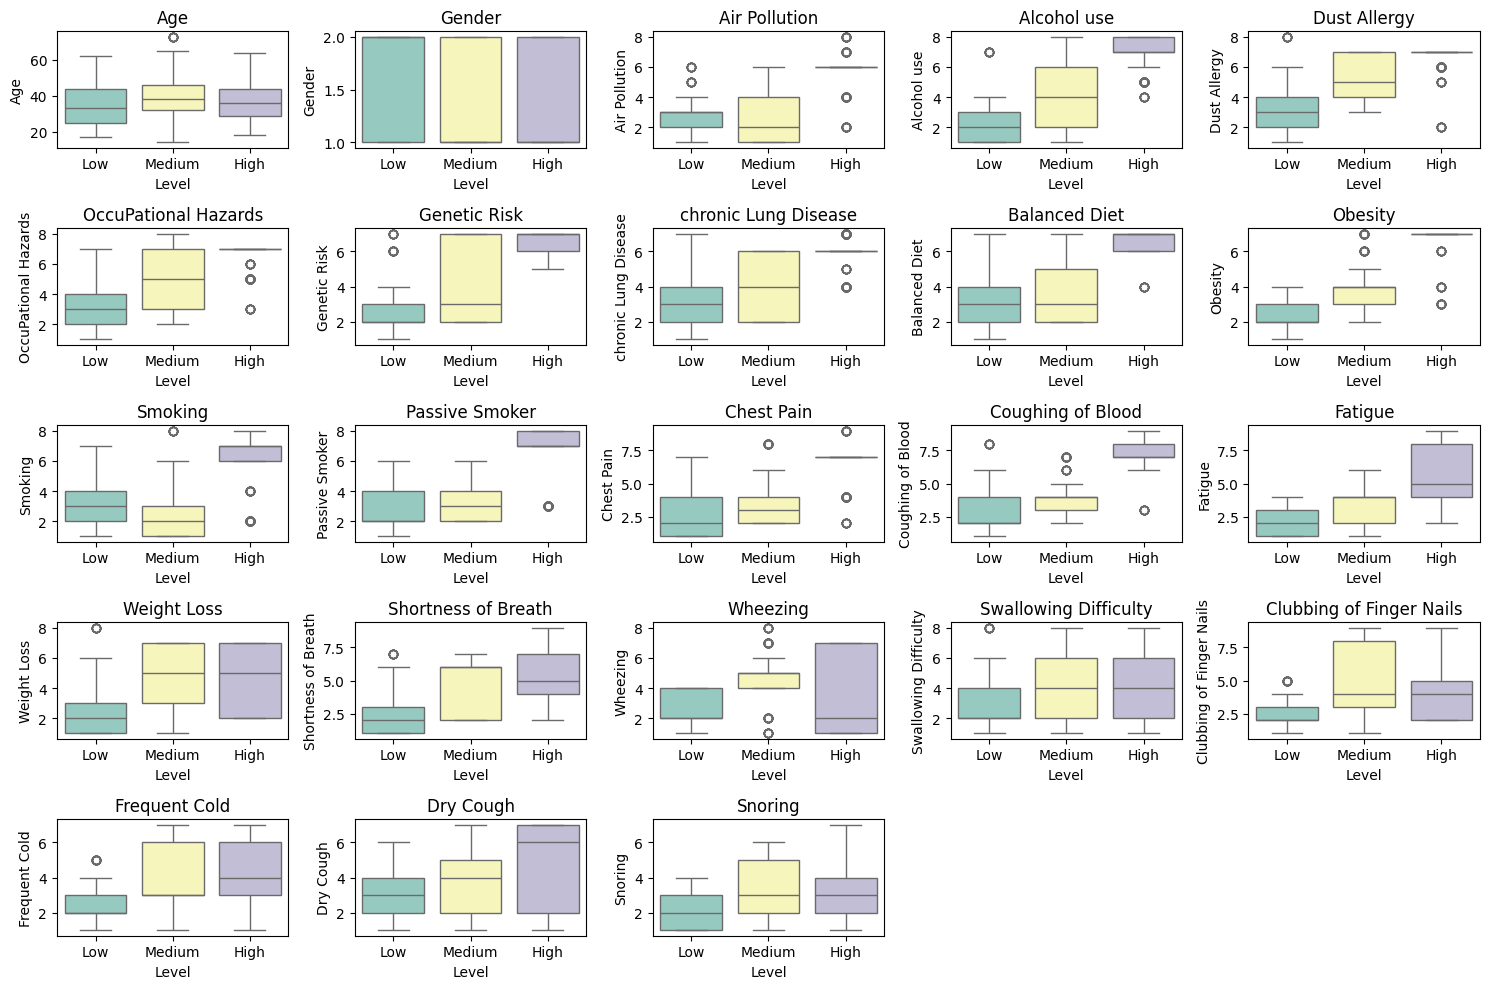

In [304]:
# Box plots for features against the target variable 'Level'
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(5, 5, i + 1)
    sns.boxplot(x='Level', y=feature, data=data, palette='Set3')
    plt.title(feature)
plt.tight_layout()
plt.show()

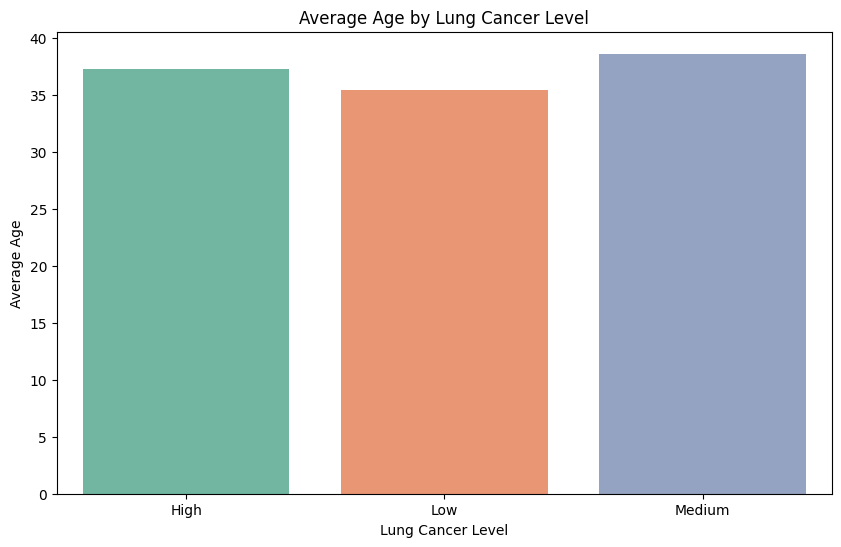

In [305]:
# Bar plot for Average Age vs. Level
plt.figure(figsize=(10, 6))
average_age = data.groupby('Level')['Age'].mean().reset_index()
sns.barplot(x='Level', y='Age', data=average_age, palette='Set2')
plt.title('Average Age by Lung Cancer Level')
plt.xlabel('Lung Cancer Level')
plt.ylabel('Average Age')
plt.show()

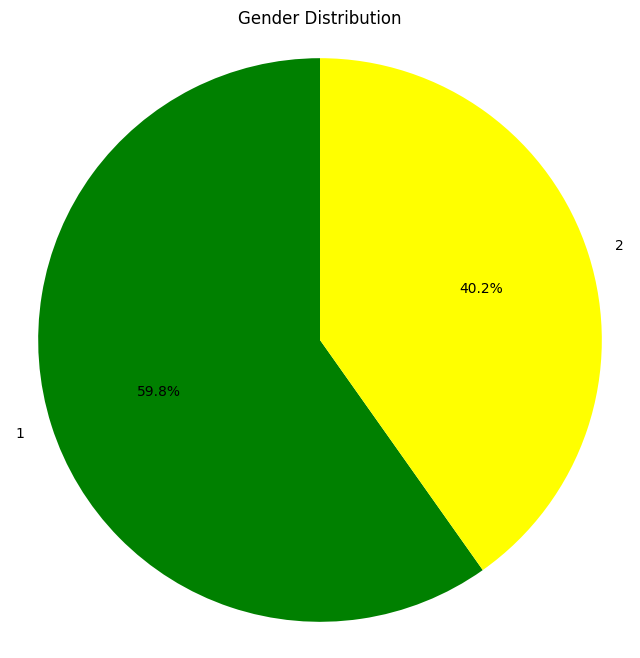

In [306]:
# Pie chart for Gender Distribution
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'yellow'])
plt.title('Gender Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

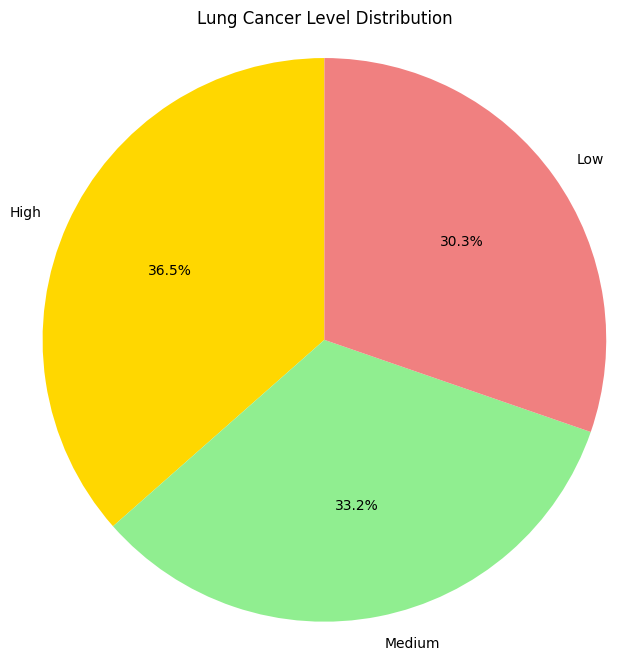

In [307]:
# Pie chart for Level Distribution
level_counts = data['Level'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(level_counts, labels=level_counts.index, autopct='%1.1f%%', startangle=90, colors=['gold', 'lightgreen', 'lightcoral'])
plt.title('Lung Cancer Level Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [308]:
# Preprocessing
# Encode categorical variables
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Level'] = label_encoder.fit_transform(data['Level'])

In [309]:
# Features and target
X = data.drop(['index', 'Patient Id', 'Level'], axis=1)
y = data['Level']

In [310]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [311]:
# Step 1: Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [312]:
print("Shape of X_train_resampled:", X_train_resampled.shape)
print("Shape of y_train_resampled:", y_train_resampled.shape)


Shape of X_train_resampled: (849, 23)
Shape of y_train_resampled: (849,)


In [313]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [314]:
# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),  # Add dropout
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Assuming binary classification
])

In [323]:
from keras.callbacks import EarlyStopping
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
ann_history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.6226 - loss: -9123.1562 - val_accuracy: 0.7250 - val_loss: -6485.9487
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6022 - loss: -10350.9805 - val_accuracy: 0.7250 - val_loss: -6688.9053
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6236 - loss: -9386.7490 - val_accuracy: 0.7250 - val_loss: -6894.0205
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6321 - loss: -9308.1172 - val_accuracy: 0.7250 - val_loss: -7106.9814
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6307 - loss: -9662.5615 - val_accuracy: 0.7250 - val_loss: -7325.0732
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6007 - loss: -11464.6133 - val_accuracy: 0.7250 - val_loss: -7560.8506
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6373 - loss: -10224.0000 - val_accuracy: 0.7250 - val_loss: -7790.6460
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accura

In [324]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype(int)  # Threshold set to 0.5 for binary classification

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))





7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        82
           1       0.45      1.00      0.62        55
           2       0.00      0.00      0.00        63

    accuracy                           0.67       200
   macro avg       0.48      0.65      0.54       200
weighted avg       0.54      0.67      0.57       200



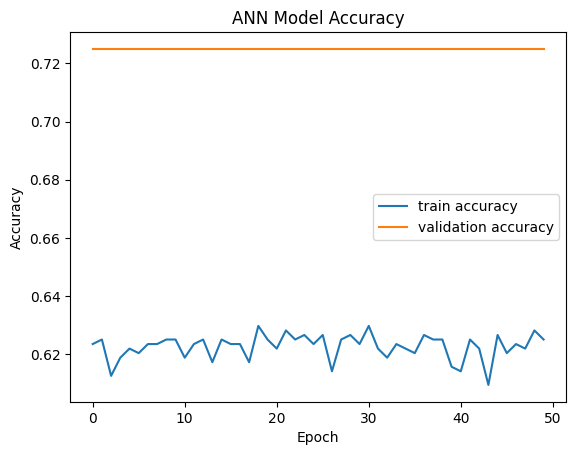

In [325]:
# Visualization for ANN
plt.plot(ann_history.history['accuracy'], label='train accuracy')
plt.plot(ann_history.history['val_accuracy'], label='validation accuracy')
plt.title('ANN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [326]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

# Define FNN model
fnn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),  # Input layer
    Dropout(0.3),  # Regularization to reduce overfitting
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.3),
    Dense(32, activation='relu'),  # Hidden layer
    Dense(1, activation='sigmoid')  # Output layer (for binary classification)
])

In [327]:
# Compile the model
fnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [330]:
# Train the model
FNN_history= fnn_model.fit(
    X_train_resampled, y_train_resampled,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4064 - loss: -41754028.0000 - val_accuracy: 0.5294 - val_loss: -32926308.0000
Epoch 2/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3991 - loss: -48788608.0000 - val_accuracy: 0.5294 - val_loss: -34159876.0000
Epoch 3/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4170 - loss: -54409004.0000 - val_accuracy: 0.5294 - val_loss: -35493528.0000
Epoch 4/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4004 - loss: -52595460.0000 - val_accuracy: 0.5471 - val_loss: -36807472.0000
Epoch 5/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4146 - loss: -60049460.0000 - val_accuracy: 0.5294 - val_loss: -37961612.0000
Epoch 6/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3821 - loss: -73509760.0000 - val_accuracy: 0.5294 - val_loss: -39209932.0000
Epoch 7/50
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4141 - loss: -56553720.0000 - val_accuracy: 0.5471 - val_loss: -40637804.0000
Epo

In [331]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred_fnn = (fnn_model.predict(X_test) > 0.5).astype(int)

# Calculate accuracy
accuracy_fnn = accuracy_score(y_test, y_pred_fnn)
print(f"FNN Accuracy: {accuracy_fnn:.2f}")

# Classification report
print("\nFNN Classification Report:")
print(classification_report(y_test, y_pred_fnn))



7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
FNN Accuracy: 0.65

FNN Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        82
           1       0.48      0.93      0.63        55
           2       0.00      0.00      0.00        63

    accuracy                           0.65       200
   macro avg       0.44      0.63      0.51       200
weighted avg       0.48      0.65      0.54       200



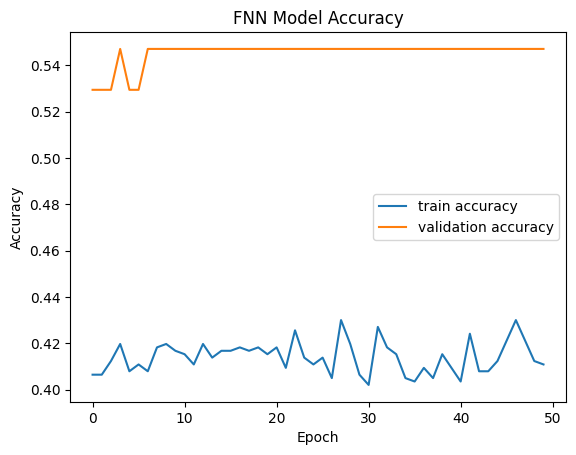

In [332]:
# Visualization for FNN
plt.plot(FNN_history.history['accuracy'], label='train accuracy')
plt.plot(FNN_history.history['val_accuracy'], label='validation accuracy')
plt.title('FNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()